<a href="https://colab.research.google.com/github/2303A51553/ADM_2025/blob/main/Lab_07_1553.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LINEAR REGRESSION

#Simple linear regression

Problem Statement:
Build a model which predicts salaries based on the money for different employees

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

Reading and Understanding the Data

In [4]:
data=pd.DataFrame(pd.read_csv("/content/SLR_Salary_dataset.csv"))
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


Data Inspection

In [5]:
data.shape

(30, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [7]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


Data Cleaning

In [8]:
# Checking Null values
data.isnull().sum()*100/data.shape[0]
# There are no NULL values in the dataset, hence it is clean

,0
Unnamed: 0,0.0
YearsExperience,0.0
Salary,0.0


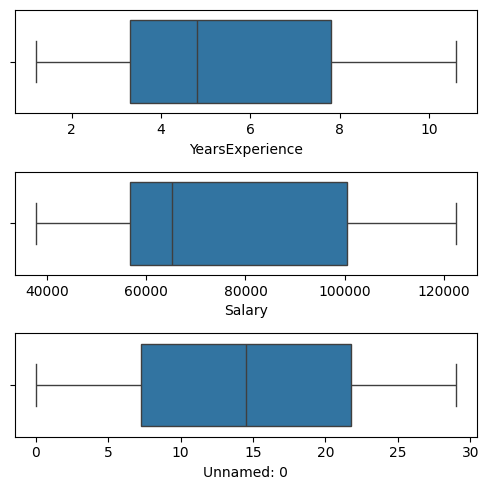

In [9]:
# Outlier Analysis
fig,axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(x=data['YearsExperience'], ax=axs[0]) # Changed 'TV' to 'YearsExperience'
plt2=sns.boxplot(x=data['Salary'],ax=axs[1]) # Changed 'Newspaper' to 'Salary'
plt3=sns.boxplot(x=data.iloc[:,0],ax=axs[2])  # Changed 'Radio' to data.iloc[:, 0] for the first column (Unnamed: 0)
plt.tight_layout()

Exploratory Data Analysis

Univariate Analysis

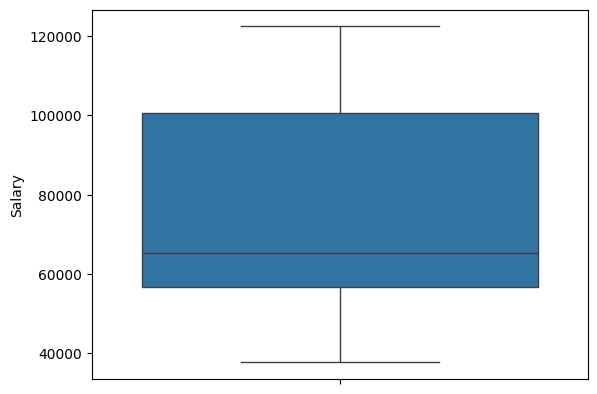

In [10]:
sns.boxplot(data['Salary'])
plt.show()

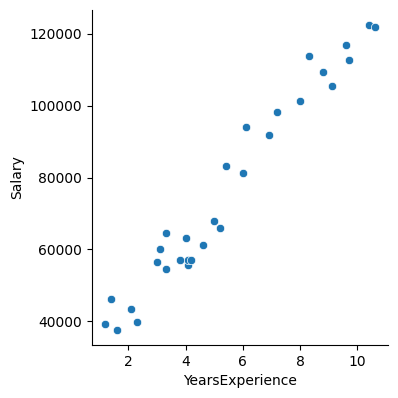

In [11]:
# Let's see how Salary are related with other variables using scatter plot.
sns.pairplot(data,x_vars=['YearsExperience'],y_vars='Salary',height=4,aspect=1,kind='scatter') # Changed 'advertising' to 'data' and adjusted x_vars
plt.show()

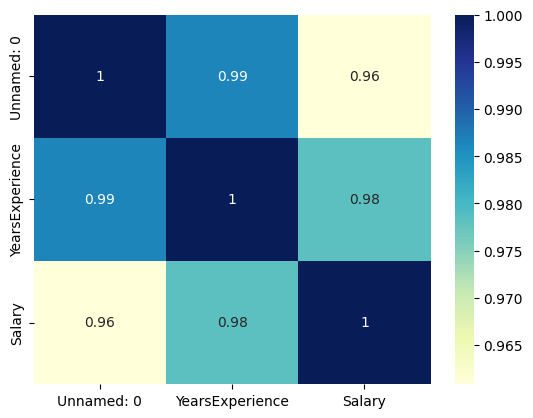

In [12]:
# Let's see the correlation between different variables.
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

Model Building

In [13]:
X=data['YearsExperience']
y=data['Salary']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state =100)

In [15]:
X_train.head()

,YearsExperience
27,9.7
25,9.1
6,3.1
17,5.4
22,8.0


In [16]:
y_train.head()


,Salary
27,112636.0
25,105583.0
6,60151.0
17,83089.0
22,101303.0


In [17]:
import statsmodels.api as sm


In [18]:
# Add a constant to get an intercept
X_train_sm=sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr=sm.OLS(y_train,X_train_sm).fit()


In [19]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

,0
const,25883.95348
YearsExperience,9361.11639


In [20]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     430.7
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           6.14e-16
Time:                        07:55:27   Log-Likelihood:                -241.95
No. Observations:                  24   AIC:                             487.9
Df Residuals:                      22   BIC:                             490.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.588e+04   2691.427     

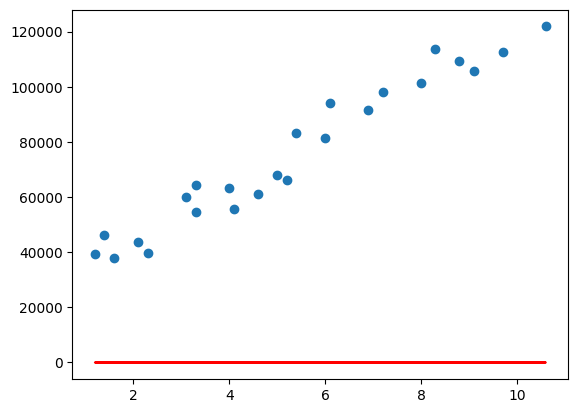

In [21]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948 +0.054*X_train,'r')
plt.show()

Model Evaluation¶


In [22]:
y_train_pred=lr.predict(X_train_sm)
res=(y_train-y_train_pred)

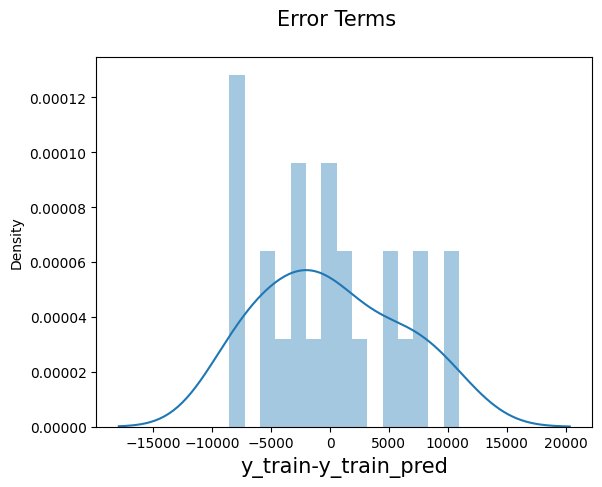

In [23]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)                  # Plot heading
plt.xlabel('y_train-y_train_pred',fontsize=15)         # X-label
plt.show()

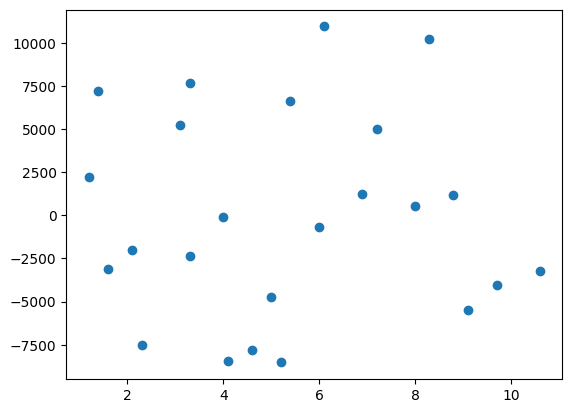

In [24]:
plt.scatter(X_train,res)
plt.show()


In [25]:
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [26]:
y_pred.head()


,0
9,61456.195763
26,115750.670827
28,123239.563939
13,65200.642319
5,53967.302651


In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [28]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(4947.434596804271)

Checking the R-squared on the test set

In [29]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9720725422361337

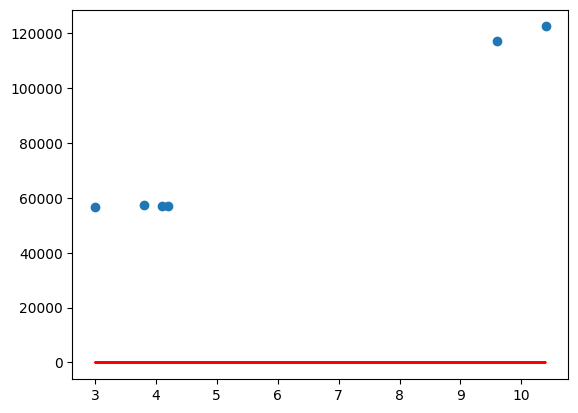

In [30]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

#LOGISTIC REGRESSION

In [31]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv("/content/Logistic Regression _diabetes-dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
# Rename the DataFrame to churn_df
df=df.copy()

# Select all columns from the diabetes dataset
df=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

# Convert the 'Outcome' column to integer type
df['Outcome']=df['Outcome'].astype('int')

# Display the first few rows of churn_df
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
df.shape

(768, 9)

In [35]:
X = np.asarray(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']])
X[0:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01, 1.000e+00],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01, 0.000e+00],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01, 1.000e+00],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01, 0.000e+00],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01, 1.000e+00]])

In [36]:
y = np.asarray(df['Outcome'])
y [0:5]

array([1, 0, 1, 0, 1])

In [37]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415,  1.36589591],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944, -0.73212021],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ,  1.36589591]])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 9) (614,)
Test set: (154, 9) (154,)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [40]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [41]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.79944181, 0.20055819],
       [0.83109399, 0.16890601],
       [0.83802896, 0.16197104],
       [0.74657191, 0.25342809],
       [0.25701559, 0.74298441],
       [0.13658532, 0.86341468],
       [0.1932768 , 0.8067232 ],
       [0.18937959, 0.81062041],
       [0.10312462, 0.89687538],
       [0.80059285, 0.19940715],
       [0.72005543, 0.27994457],
       [0.85784466, 0.14215534],
       [0.25464582, 0.74535418],
       [0.86045344, 0.13954656],
       [0.82499728, 0.17500272],
       [0.17339084, 0.82660916],
       [0.11192131, 0.88807869],
       [0.10719667, 0.89280333],
       [0.86641987, 0.13358013],
       [0.85986895, 0.14013105],
       [0.82864574, 0.17135426],
       [0.68413634, 0.31586366],
       [0.77349534, 0.22650466],
       [0.13015047, 0.86984953],
       [0.27896427, 0.72103573],
       [0.76421182, 0.23578818],
       [0.84409835, 0.15590165],
       [0.21094845, 0.78905155],
       [0.25107373, 0.74892627],
       [0.27368025, 0.72631975],
       [0.

Evaluation

In [42]:
from sklearn.metrics import jaccard_score # Import jaccard_score instead of jaccard_similarity_score
jaccard_score(y_test, yhat) # Use jaccard_score for calculating the Jaccard similarity score

np.float64(0.9811320754716981)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))


[[ 52   0]
 [  1 101]]


Confusion matrix, without normalization
[[ 52   0]
 [  1 101]]


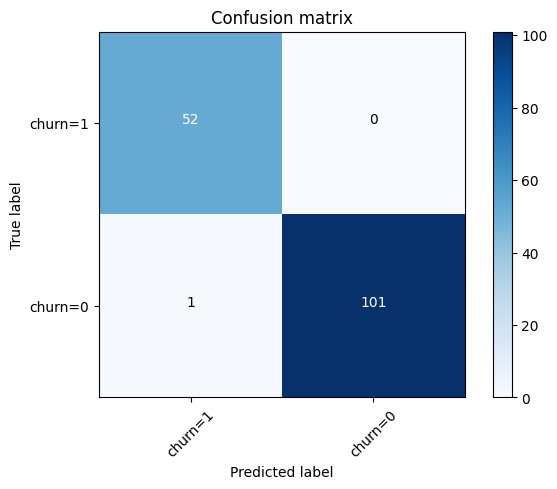

In [44]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')


In [45]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       102
           1       0.98      1.00      0.99        52

    accuracy                           0.99       154
   macro avg       0.99      1.00      0.99       154
weighted avg       0.99      0.99      0.99       154



In [46]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.2243421735493767

In [47]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.20


#Multiple Linear Regression

In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score


In [50]:
d=pd.read_csv("/content/multiple_linear_regression_dataset.csv")

In [51]:
d.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [52]:
d.shape

(20, 3)

In [53]:
print(d.corr())

                 age  experience    income
age         1.000000    0.615165  0.532204
experience  0.615165    1.000000  0.984227
income      0.532204    0.984227  1.000000


In [54]:
print(d.describe())

             age  experience        income
count  20.000000   20.000000     20.000000
mean   39.650000    6.200000  40735.500000
std    10.027725    4.124382   8439.797625
min    23.000000    1.000000  27840.000000
25%    31.500000    3.750000  35452.500000
50%    40.000000    5.000000  40190.000000
75%    47.000000    9.000000  45390.000000
max    58.000000   17.000000  63600.000000


In [55]:
X = d[['age', 'experience']]
y = d['income']

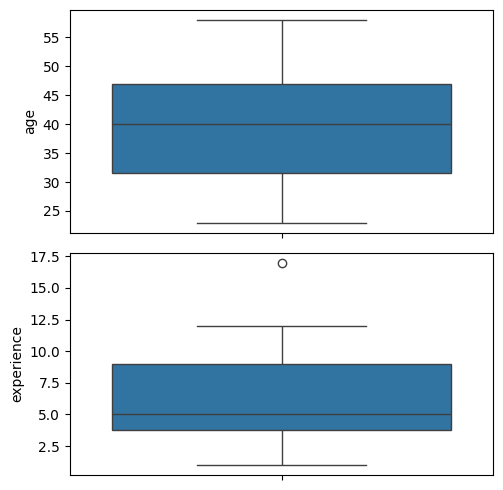

In [56]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(d['age'], ax = axs[0])
plt2 = sns.boxplot(d['experience'], ax = axs[1])
plt.tight_layout()

#Exploratory Data Analysis

Distribution of the target variable



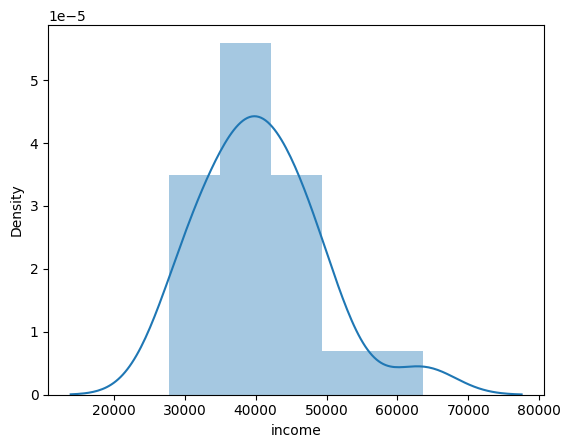

In [57]:
sns.distplot(d['income']);


Conclusion: It is normally distributed

Conclusion: It is normally distributed

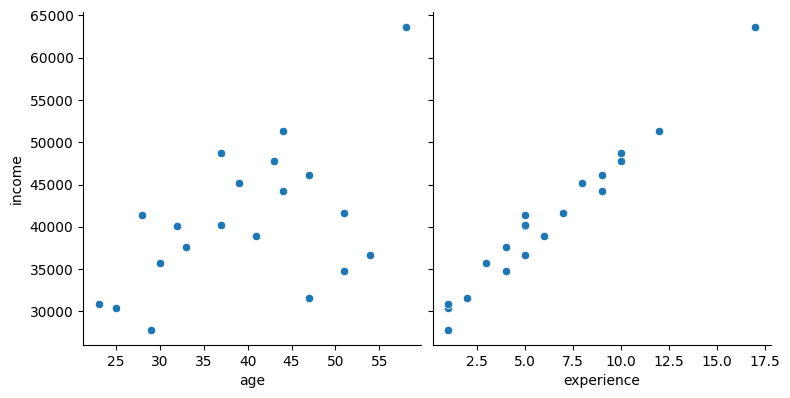

In [58]:
# Assuming 'd' DataFrame contains 'age', 'experience', and 'income' columns
sns.pairplot(d, x_vars=['age', 'experience'], y_vars='income', height=4, aspect=1, kind='scatter')
plt.show()

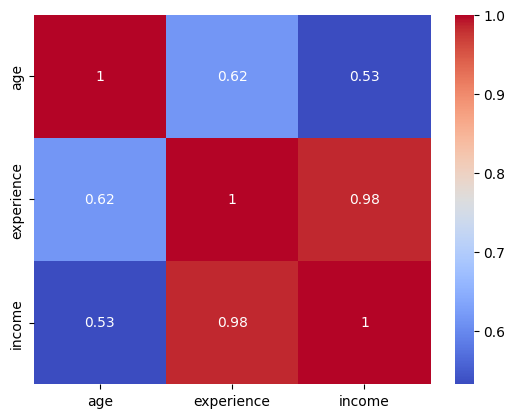

In [59]:
# Create the correlation matrix and represent it as a heatmap.
sns.heatmap(d.corr(), annot = True, cmap = 'coolwarm')
plt.show()

#Model Building

Splitting the dataset into train and test set



In [60]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [61]:
y_train.shape

(14,)

In [62]:
y_test.shape

(6,)

In [63]:
reg_model = linear_model.LinearRegression()

In [64]:
#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [65]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  30510.643844104634


[('age', np.float64(-79.68088640690299)),
 ('experience', np.float64(2167.573549181646))]

In [66]:
#Predicting the Test and Train set result
y_pred= reg_model.predict(X_test)
x_pred= reg_model.predict(X_train)

In [67]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [30845.56 49238.19 46273.8  46512.85 35117.21 39117.45]


In [68]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
17,30870,30845.557006
19,48700,49238.186539
11,46110,46273.804126
18,44190,46512.846785
13,34800,35117.212834
6,41340,39117.446771


In [69]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 931.5077511414116
Mean Square Error: 1792176.3379165696
Root Mean Square Error: 1338.7219046226776
